**Repaso de algoritmos de machine learning**


1.   SVM
2.   Decision Tree Classifier
3.   Random Forest 
4.   K-NN



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drug200.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.shape

(200, 6)

In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Estadistica descriptiva**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [7]:
#cantidad drogas
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [8]:
#cantidad bp 
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [9]:
#cantidad colesterol
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [10]:
#estudio de skewness
skew_age = data['Age'].skew(axis=0,skipna=True)
skew_na_to_k = data['Na_to_K'].skew(axis=0,skipna=True)

In [11]:
print(f'skewness age : {skew_age}')
print(f'skewness Na to K : {skew_na_to_k}')

skewness age : 0.03030835703000607
skewness Na to K : 1.039341186028881


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


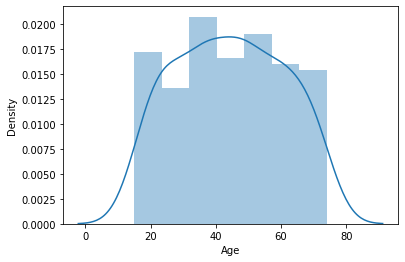

In [12]:
#graficando 
sns.distplot(data.Age)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


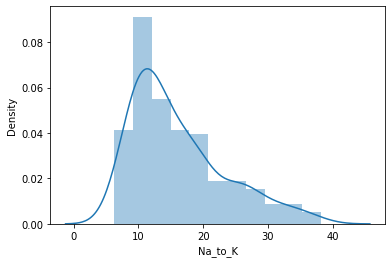

In [13]:
sns.distplot(data.Na_to_K)
plt.show()

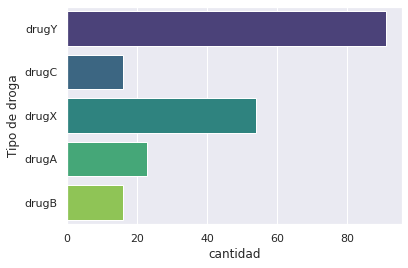

In [14]:
#distribucion por tipo de droga
sns.set_theme(style='darkgrid')
sns.countplot(y='Drug',data=data,palette='viridis')
plt.xlabel('cantidad')
plt.ylabel('Tipo de droga')
plt.show()

In [15]:
91/200

0.455

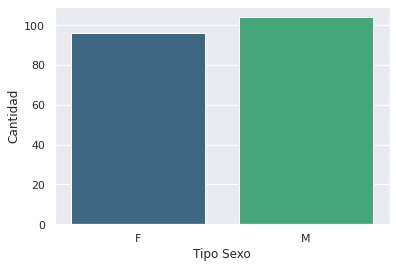

In [16]:
#Sexo
sns.set_theme(style='darkgrid')
sns.countplot(x='Sex',data=data,palette='viridis')
plt.xlabel('Tipo Sexo')
plt.ylabel('Cantidad')
plt.show()

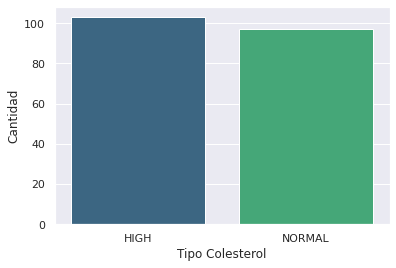

In [17]:
#colesterol
sns.set_theme(style='darkgrid')
sns.countplot(x='Cholesterol',data=data,palette='viridis')
plt.xlabel('Tipo Colesterol')
plt.ylabel('Cantidad')
plt.show()

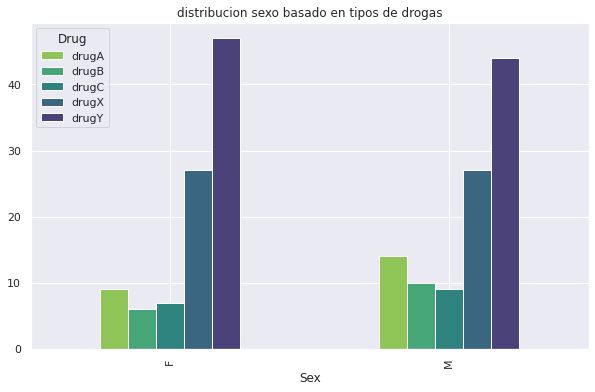

In [18]:
#crosstab pandas 

pd.crosstab(data.Sex,data.Drug).plot(kind='bar',figsize=(10,6),color=['#8fc456','#47a678','#2e837f','#3b6682','#4b4279'])
plt.title('distribucion sexo basado en tipos de drogas')
plt.show()

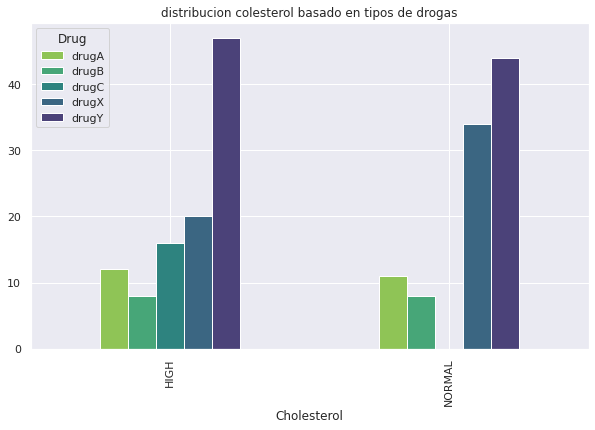

In [19]:

pd.crosstab(data.Cholesterol,data.Drug).plot(kind='bar',figsize=(10,6),color=['#8fc456','#47a678','#2e837f','#3b6682','#4b4279'])
plt.title('distribucion colesterol basado en tipos de drogas')
plt.show()

# SVM

In [43]:
#Creacion de modelos de machine learning
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [26]:
#seleccion de variables
X = data.drop(['Drug'],axis=1)
X = pd.get_dummies(X)
y = data.Drug

In [40]:
#separacion de data de entrenamiento y testeo
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.5)


In [44]:
SVCModel = SVC(kernel='linear',max_iter=250).fit(X_train,y_train)
y_pred = SVCModel.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       0.91      1.00      0.95        10
       drugB       0.86      0.86      0.86         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00        28
       drugY       1.00      0.98      0.99        47

    accuracy                           0.98       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.98      0.98      0.98       100

[[10  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 28  0]
 [ 0  1  0  0 46]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


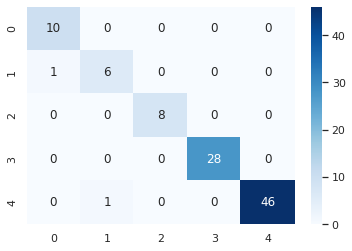

In [46]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,cmap='Blues')

In [47]:
print(f'accuracy score : {accuracy_score(y_pred,y_test)}')

accuracy score : 0.98


# DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [50]:
TreeModel = DecisionTreeClassifier(max_leaf_nodes=20).fit(X_train,y_train)
y_pred = TreeModel.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'accuracy score: {accuracy_score(y_pred,y_test)}')

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      0.96      0.98        28
       drugY       0.98      1.00      0.99        47

    accuracy                           0.97       100
   macro avg       0.96      0.94      0.94       100
weighted avg       0.97      0.97      0.97       100

[[10  0  0  0  0]
 [ 2  5  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 27  1]
 [ 0  0  0  0 47]]
accuracy score: 0.97


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RFModel = RandomForestClassifier(max_leaf_nodes=20).fit(X_train,y_train)
y_pred = RFModel.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'accuracy score: {accuracy_score(y_pred,y_test)}')


              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      0.96      0.98        28
       drugY       0.98      1.00      0.99        47

    accuracy                           0.97       100
   macro avg       0.96      0.94      0.94       100
weighted avg       0.97      0.97      0.97       100

[[10  0  0  0  0]
 [ 2  5  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 27  1]
 [ 0  0  0  0 47]]
accuracy score: 0.97


# K-NN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KNNModel = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
y_pred = KNNModel.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'accuracy score: {accuracy_score(y_pred,y_test)}')

              precision    recall  f1-score   support

       drugA       0.17      0.10      0.12        10
       drugB       0.21      0.43      0.29         7
       drugC       0.00      0.00      0.00         8
       drugX       0.44      0.57      0.50        28
       drugY       0.93      0.87      0.90        47

    accuracy                           0.61       100
   macro avg       0.35      0.39      0.36       100
weighted avg       0.59      0.61      0.60       100

[[ 1  0  0  9  0]
 [ 0  3  0  4  0]
 [ 2  0  0  5  1]
 [ 3  7  0 16  2]
 [ 0  4  0  2 41]]
accuracy score: 0.61


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
